In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_healthy = r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Tomato___healthy"
train_files_powdery = r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Squash___Powdery_mildew"
train_files_rust =r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Apple___Cedar_apple_rust"

test_files_healthy = r"C:\Users\uppal\Downloads\plant dataset\test\test"
test_files_powdery = r"C:\Users\uppal\Downloads\plant dataset\test\test"
test_files_rust = r"C:\Users\uppal\Downloads\plant dataset\test\test"

valid_files_healthy = r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Tomato___healthy"
valid_files_powdery = r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Squash___Powdery_mildew"
valid_files_rust = r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid\Apple___Cedar_apple_rust"

print("Number of healthy leaf images in training set", total_files(train_files_healthy))
print("Number of powder leaf images in training set", total_files(train_files_powdery))
print("Number of rusty leaf images in training set", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set", total_files(test_files_healthy))
print("Number of powder leaf images in test set", total_files(test_files_powdery))
print("Number of rusty leaf images in test set", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set", total_files(valid_files_healthy))
print("Number of powder leaf images in validation set", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set", total_files(valid_files_rust))

Number of healthy leaf images in training set 1926
Number of powder leaf images in training set 1736
Number of rusty leaf images in training set 1760
Number of healthy leaf images in test set 33
Number of powder leaf images in test set 33
Number of rusty leaf images in test set 33
Number of healthy leaf images in validation set 481
Number of powder leaf images in validation set 434
Number of rusty leaf images in validation set 440


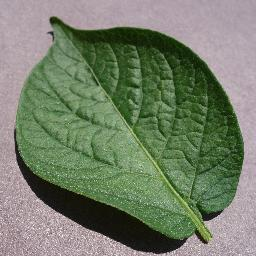

In [2]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\uppal\Downloads\plant dataset\test\test\PotatoHealthy1.JPG"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))

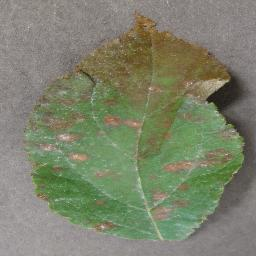

In [3]:
image_path = r"C:\Users\uppal\Downloads\plant dataset\test\test\AppleCedarRust4.JPG"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=300))

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\uppal\Downloads\plant dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(38, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5


2197/2197 [==============================] - 33529s 15s/step - loss: 1.8230 - accuracy: 0.4653 - val_loss: 1.2621 - val_accuracy: 0.6253
Epoch 2/5
2197/2197 [==============================] - 4183s 2s/step - loss: 0.9553 - accuracy: 0.7031 - val_loss: 0.9596 - val_accuracy: 0.7107
Epoch 3/5
2197/2197 [==============================] - 5817s 3s/step - loss: 0.7030 - accuracy: 0.7790 - val_loss: 0.6699 - val_accuracy: 0.7955
Epoch 4/5
2197/2197 [==============================] - 10403s 5s/step - loss: 0.5634 - accuracy: 0.8208 - val_loss: 0.6866 - val_accuracy: 0.7871
Epoch 5/5
2197/2197 [==============================] - 4565s 2s/step - loss: 0.4788 - accuracy: 0.8474 - val_loss: 0.6618 - val_accuracy: 0.7944


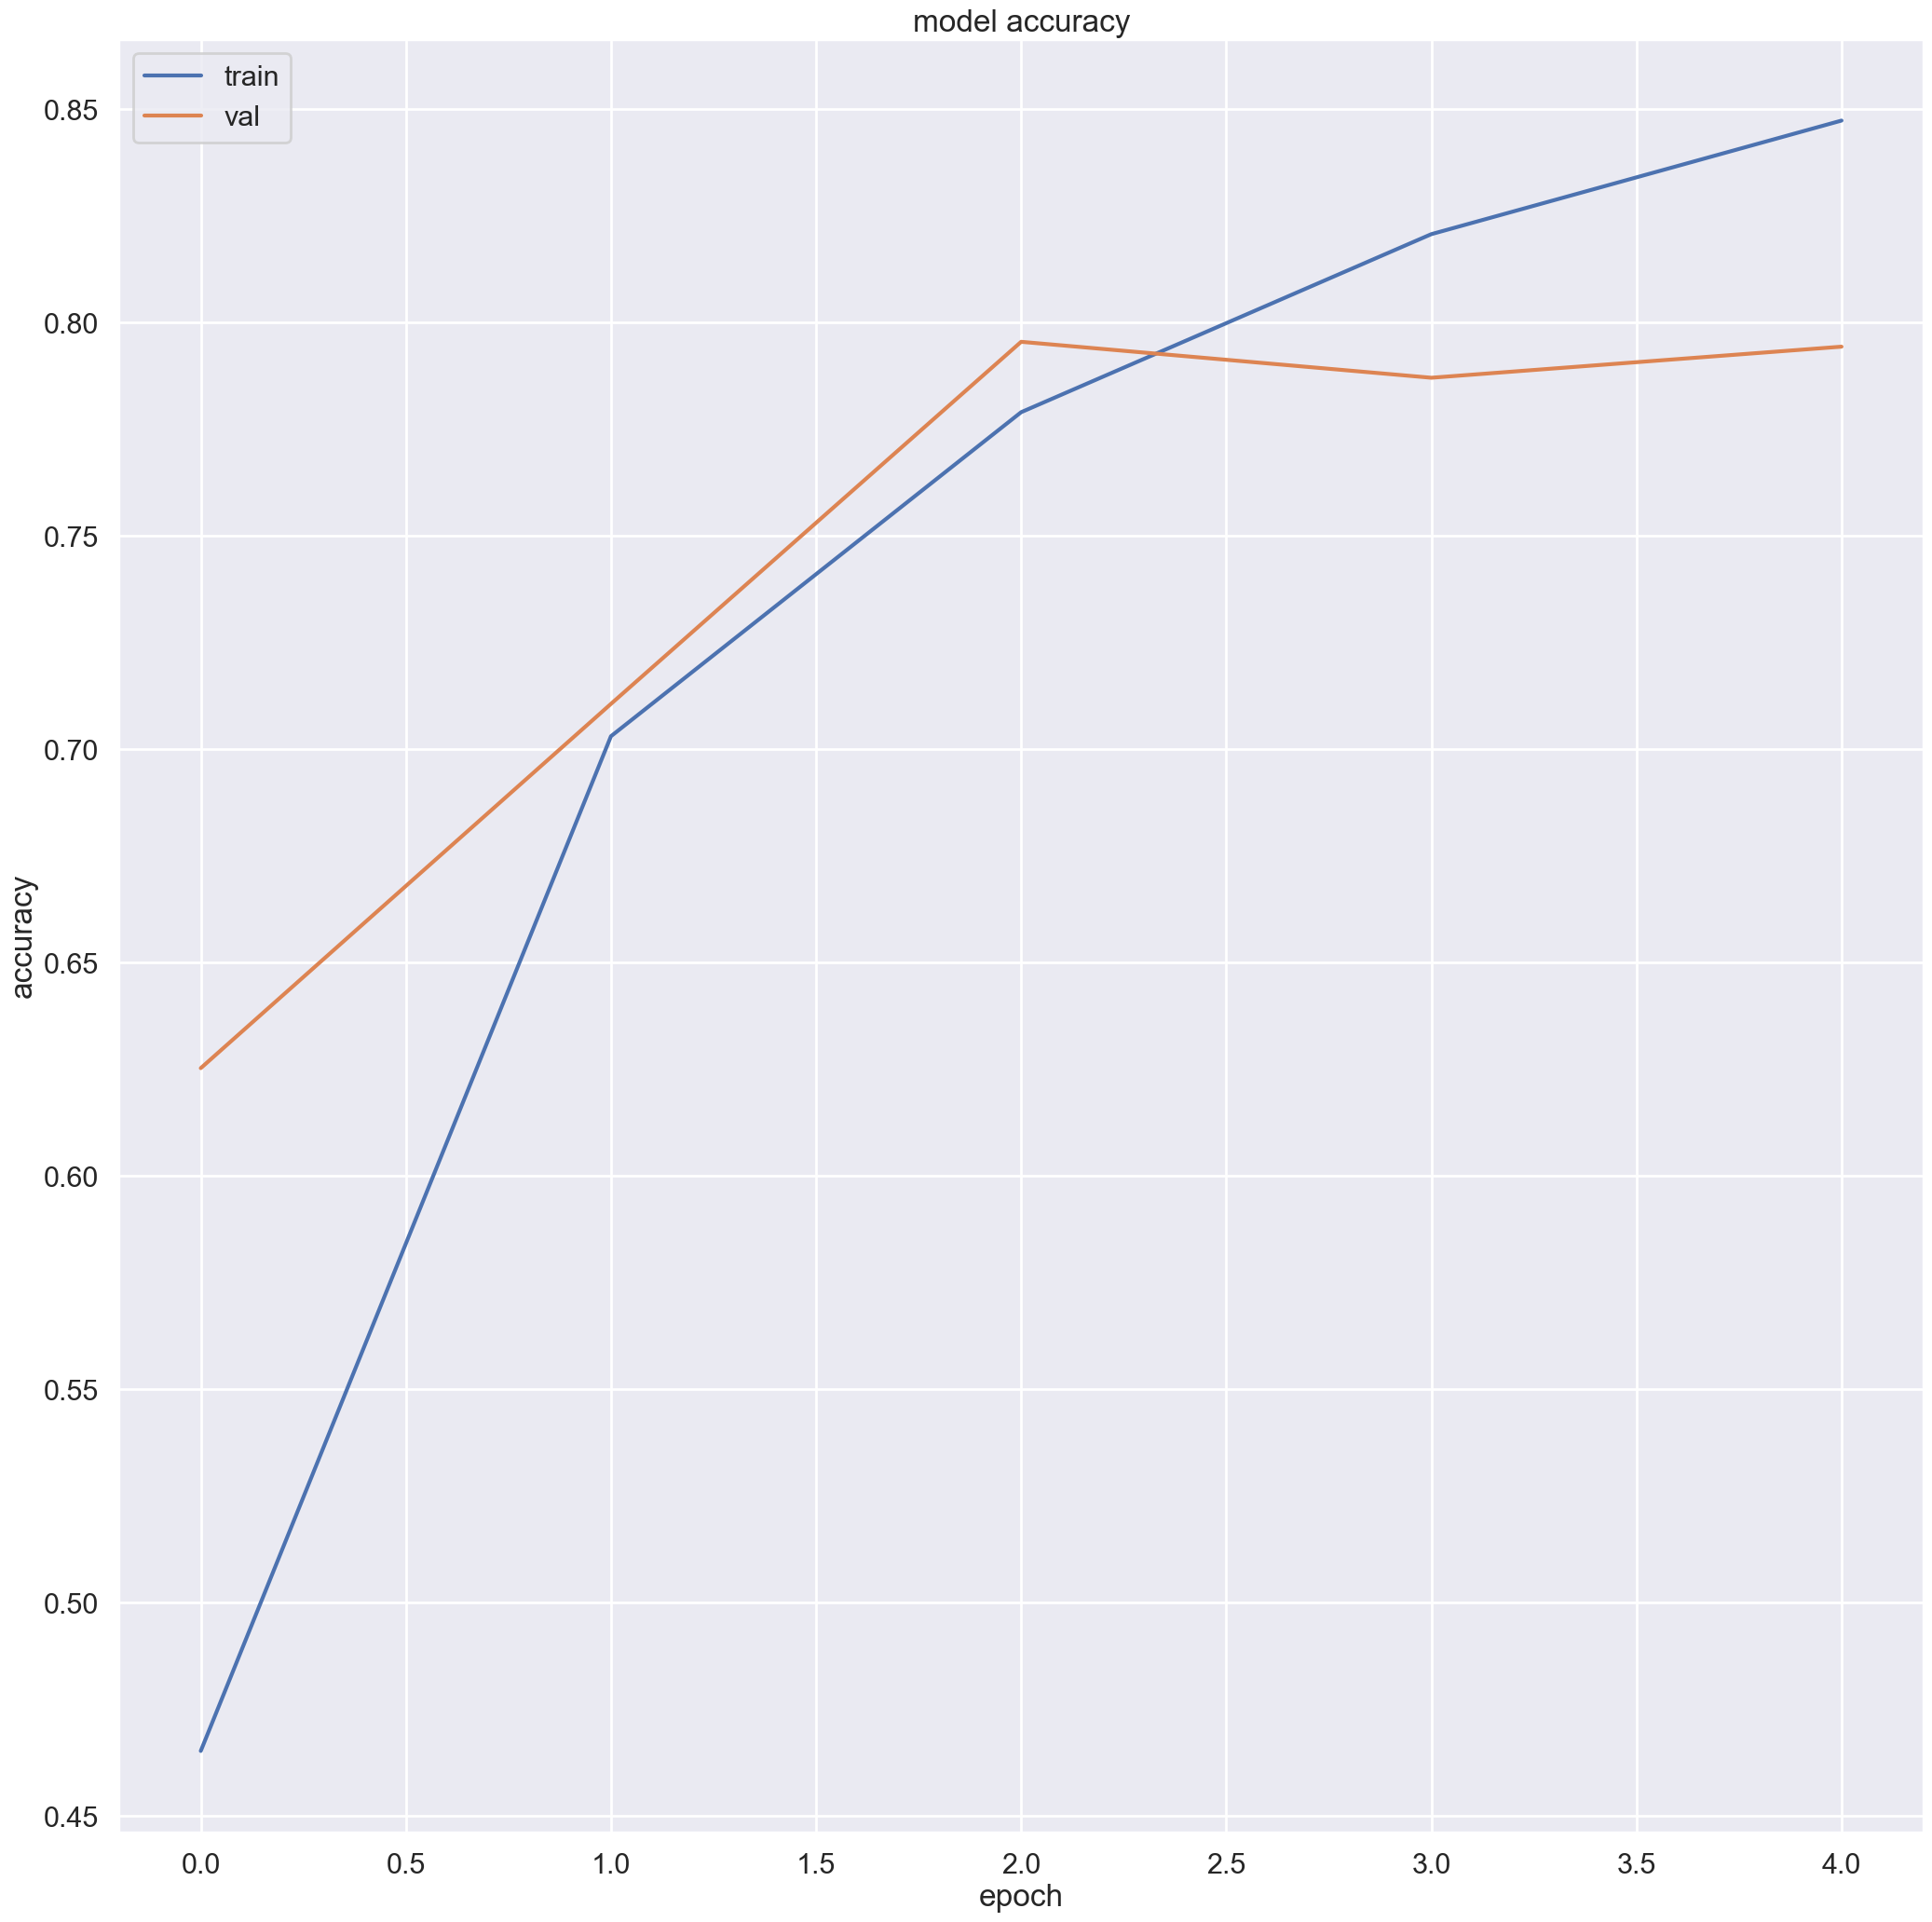

In [9]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [10]:
model.save("model.h5")
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\uppal\Downloads\plant dataset\test\test\CornCommonRust3.JPG")
predictions = model.predict(x)
predictions[0]

C:\Users\uppal\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 362ms/step


array([4.2733644e-18, 8.3558562e-21, 1.3695297e-11, 2.4195751e-33,
       0.0000000e+00, 4.1379061e-26, 0.0000000e+00, 9.7619761e-07,
       9.9999881e-01, 1.7474875e-07, 0.0000000e+00, 9.0329582e-32,
       1.0319314e-30, 0.0000000e+00, 0.0000000e+00, 1.1636124e-24,
       3.7379370e-11, 4.0494815e-23, 7.3937294e-11, 1.1240668e-31,
       7.3146101e-13, 7.1161823e-21, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.5156309e-37, 3.1877713e-18, 0.0000000e+00,
       1.2730938e-23, 2.0284636e-10, 1.0509574e-13, 2.1374044e-24,
       1.6333143e-22, 0.0000000e+00, 4.9501913e-28, 0.0000000e+00,
       0.0000000e+00, 2.6930160e-28], dtype=float32)

In [12]:
predictions = model.predict(x)
predictions[0]



1/1 [==============================] - 0s 63ms/step


array([4.2733644e-18, 8.3558562e-21, 1.3695297e-11, 2.4195751e-33,
       0.0000000e+00, 4.1379061e-26, 0.0000000e+00, 9.7619761e-07,
       9.9999881e-01, 1.7474875e-07, 0.0000000e+00, 9.0329582e-32,
       1.0319314e-30, 0.0000000e+00, 0.0000000e+00, 1.1636124e-24,
       3.7379370e-11, 4.0494815e-23, 7.3937294e-11, 1.1240668e-31,
       7.3146101e-13, 7.1161823e-21, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.5156309e-37, 3.1877713e-18, 0.0000000e+00,
       1.2730938e-23, 2.0284636e-10, 1.0509574e-13, 2.1374044e-24,
       1.6333143e-22, 0.0000000e+00, 4.9501913e-28, 0.0000000e+00,
       0.0000000e+00, 2.6930160e-28], dtype=float32)

In [13]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}


In [14]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Corn_(maize)___Common_rust_
